In [ ]:
# Python Assignment (EEOB546): Tae-Chun Park

In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [3]:
## 1 ##
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.

In [4]:
### Dr. X tried to read a Fasta file and extract sequence data using "fasta_fn" command.
### The return would be a dictionary where keys are species names,
### and values are their corresponding sequences.

In [5]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [6]:
get_sequences_from_file("penguins_cytb.fasta") #test function on provided fasta file

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

In [7]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

In [8]:
### I tried to translate a string of nucleotides into a string of amino acids using given function above.
### Here, I made and add some changes.
### What I am trying here is that i) define a new fucntion, ii) load a codon table as "mito_table",
### iii) created empty string "aa_seq_string", iv) made a loop which divided every 3 nucleotides starting i,
### iiv) if the function find a stop codon, then stop running the fucntion, and try to translate it as amino_acid
### iiiv) finally, translated_amino_acid will be saved to aa_seq_string

In [9]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
        if codon in mito_table.stop_codons:
            break
        amino_acid = mito_table.forward_table[codon]
        aa_seq_string += amino_acid
    return aa_seq_string


In [10]:
### Check the fucntion above with the first sequence in the penguins_cytb.fasta

In [11]:
translate_function("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

In [12]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

In [13]:
### Yes, there is a function in Biopython
### Reference: https://biopython.org/docs/1.75/api/Bio.Seq.html

In [14]:
from Bio.Seq import Seq
def translate_sequence_alternative(string_nucleotides):
    dna_seq = Seq(string_nucleotides)
    aa_seq = dna_seq.translate()
    return str(aa_seq)

In [15]:
translate_sequence_alternative("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")

'MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAIHYTADTTLAFSSVAHTCRNVQYG*LIRNLHANGASFFFICIYLHIGRGFYYGSYLYKET*NTGIILLLTLMATAFVGYVLP*GQISF*GATVITNLFSAIPYIGQTLVEWT*GGFSVDNPTLTRFFALHFLLPFIIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALILLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPE*YFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTIAFRPLSQLLF*ALVANLIILT*VGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKILNH*'

In [16]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

In [17]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis # imported the function "ProParam"
def compute_molecular_weight(aa_seq): # started defining new function
    protein_analysis = ProteinAnalysis(aa_seq) # Create a ProteinAnalysis object to analyze the amino acid sequence
    molecular_weight = protein_analysis.molecular_weight() # Calculate the molecular weight of the amino acid sequence
    return molecular_weight

In [18]:
aa_seq = "MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH"
compute_molecular_weight(aa_seq)

42459.602100000004

In [19]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [20]:
def compute_gc_content(dna_seq):
    gc_count = dna_seq.count('G') + dna_seq.count('C')
    seq_length = len(dna_seq)
    gc_content = gc_count / seq_length
    return gc_content

In [21]:
compute_gc_content("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCTGAGCCCTAGTAGCCAATCTCATTATCCTAACATGAGTAGGTAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCCTCCCTCACTTACTTCACCACCCTCCTGATCCTCTTCCCCATTGCTGGGGCCCTAGAAAACAAAATACTCAACCATTAA")

0.48381452318460194

In [22]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

In [23]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [24]:
## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

In [25]:
penguins_df['molecular_weight'] = 'NaN'
penguins_df['GC_content'] = 'NaN'

In [26]:
print(penguins_df) #Check dataframe

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


In [27]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

In [28]:
for species, dna_seq in cytb_seqs.items():
    aa_seq = translate_function(dna_seq) # translate DNA sequence to get the corresponding amino acid sequence
    molecular_weight = compute_molecular_weight(aa_seq) # calculate the molecular weight of the amino acid sequence
    gc_content = compute_gc_content(dna_seq) # calculate the GC_content of the DNA sequence
    penguins_df.loc[penguins_df['species'] == species, 'molecular_weight'] = molecular_weight # update molecular weight value of the current species
    penguins_df.loc[penguins_df['species'] == species, 'GC_content'] = gc_content # update GC_content value of the current species

In [29]:
print(penguins_df) # check the function

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00       42459.6021   0.483815
1   Aptenodytes patagonicus  13.40       42563.7067   0.496938
2       Eudyptes chrysocome   2.80       42475.5753   0.511811
3     Eudyptes chrysolophus   4.50       42445.5493   0.509186
4         Eudyptes sclateri   4.25       42475.5753   0.508311
5           Eudyptula minor   1.60       42491.6408   0.492563
6        Pygoscelis adeliae   4.60        42458.614   0.490814
7     Pygoscelis antarctica   4.10       42404.5423    0.47769
8          Pygoscelis papua   6.10       42595.8759   0.471566
9       Spheniscus demersus   3.20        42431.549    0.48294
10     Spheniscus humboldti   4.75        42399.552   0.492563
11  Spheniscus magellanicus   3.40       42459.6021   0.482065


In [30]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

<Axes: title={'center': 'Mass vs Species'}, xlabel='species'>

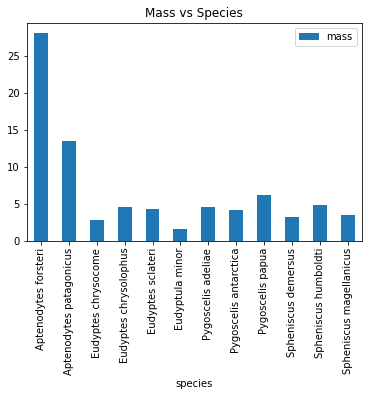

In [31]:
import matplotlib.pyplot as plt
penguins_df.plot(x='species', y='mass', kind='bar', title='Mass vs Species')
# Q1: Eudyptes minor
# Q2: https://en.wikipedia.org/wiki/Little_penguin#/media/File:Map-of-distribution-of-Eudyptula-penguins-Blue-and-red-colours-indicate.png

In [32]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

<Axes: title={'center': 'GC_content vs Molecular_weight'}, xlabel='GC_content', ylabel='molecular_weight'>

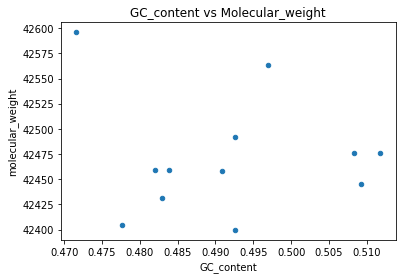

In [33]:
penguins_df.plot(y= "molecular_weight", x = "GC_content", kind = "scatter", title = 'GC_content vs Molecular_weight')

In [34]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [35]:
penguins_df.to_csv('penguins_cytb_mass.csv', index=False) # index=False, ensures that the DataFrame index is not saved

In [36]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)

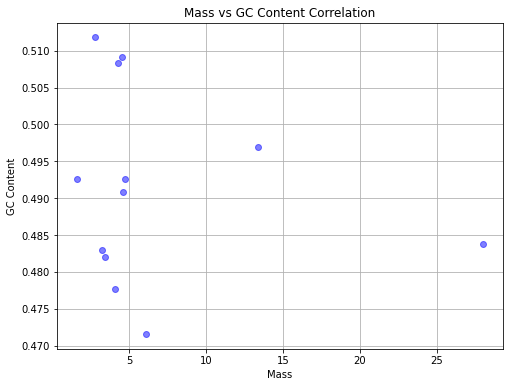

In [38]:
import matplotlib.pyplot as plt

# Plot mass vs GC content
plt.figure(figsize=(8, 6))
plt.scatter(penguins_df['mass'], penguins_df['GC_content'], color='blue', alpha=0.5)
plt.title('Mass vs GC Content Correlation')
plt.xlabel('Mass')
plt.ylabel('GC Content')
plt.grid(True)
plt.show()